In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# General Polytope 3 Dimensional

In [10]:
# df_general_poly3dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_3dimV1.pkl")
# # df_general_poly3dim_results

In [3]:
df_general_poly3dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_3dimV2.pkl")
# df_general_poly3dim_results

In [4]:
df_general_poly3dim_results.iloc[-1:]

,trial,seed,Model,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time
278,92,697997652,PMF,31.32023,"[4.640520961193315, 31.371304352653343]","[31.987880141403725, 30.974550049820717, 30.89...",None,None,None,"[[0.20363162342544042, -0.1977414883497192, 0....",None,74.195136


In [18]:
k = 7
df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['SINR'].iloc[k+0:k+10]#.hist()

21    27.702879
24    28.459887
27    10.614373
30    29.207233
33    10.691434
36    28.566627
39    30.096098
42    28.369212
45    23.626793
48    29.891698
Name: SINR, dtype: float64

In [7]:
results = df_general_poly3dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
results

,Model,SINR
0,CorInfoMax,22.849011
1,LDMI,30.113703
2,PMF,26.110226


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


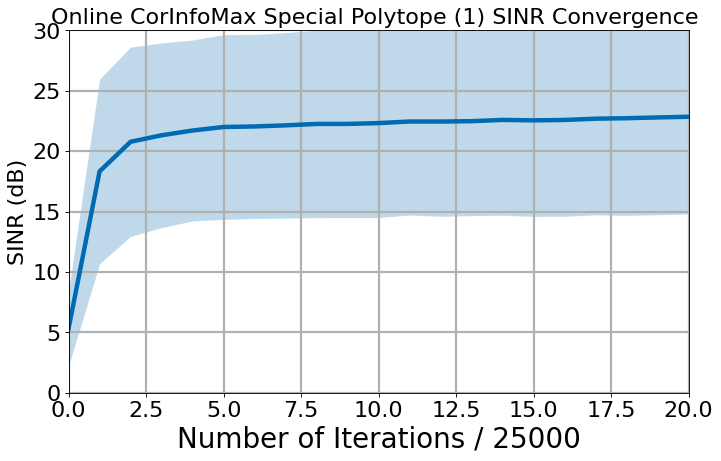

In [8]:
data = np.stack(df_general_poly3dim_results.loc[ (df_general_poly3dim_results['Model'] == "CorInfoMax")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax Special Polytope (1) SINR Convergence ")
plt.axis([0.0,20.0,-0,30])
ApplyFont(plt.gca())

(93, 13)


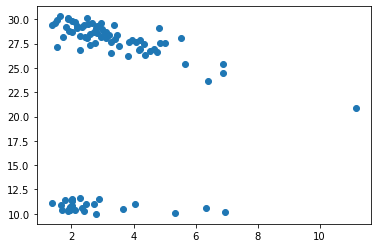

In [20]:
df = df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == 'CorInfoMax'].copy()
df['cond'] = df.apply(lambda row: np.linalg.cond(row['A']), axis = 1)
# df = df.loc[(df['cond'] < 3)]
print(df.shape)
plt.scatter(df['cond'], df['SINR'])

In [56]:
# from bss_utils import *
# k = 2
# print(df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['SINRlist'].iloc[k][-1])
# print(df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['SINR'].iloc[k])
# WfCorInfoMax = df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['Wf'].iloc[k]
# X = df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['X'].iloc[k]
# A = df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['A'].iloc[k]
# S = df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['S'].iloc[k]

# YCorInfoMax = WfCorInfoMax @ X
# SINRCorInfoMax, SNRCorInfoMax, _, _, _ = evaluate_bss(WfCorInfoMax, YCorInfoMax, A, S, mean_normalize_estimations = False)
# SINRCorInfoMax

43.638393946902156
25.986575002740793


25.986575002740796

In [79]:
df_general_poly3dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_3dimV3.pkl")
# df_general_poly3dim_results

In [80]:
results = df_general_poly3dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
results

,Model,SINR
0,CorInfoMax,28.158518
1,LDMI,39.537317
2,PMF,37.293112


<AxesSubplot:>

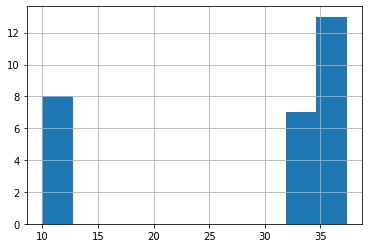

In [82]:
df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['SINR'].hist()

In [83]:
df_general_poly3dim_results.shape

(84, 12)

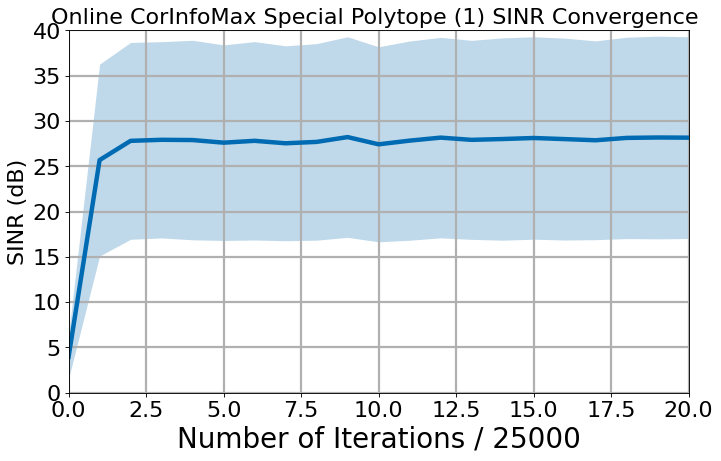

In [84]:
data = np.stack(df_general_poly3dim_results.loc[ (df_general_poly3dim_results['Model'] == "CorInfoMax")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax Special Polytope (1) SINR Convergence ")
plt.axis([0.0,20.0,-0,40])
ApplyFont(plt.gca())

# General Polytope 5 Dimensional

In [4]:
df_general_poly5dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_5dimV1.pkl")
# df_general_poly5dim_results

In [63]:
from bss_utils import *
k = 2
print(df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['SINRlist'].iloc[k][-1])
print(df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['SINR'].iloc[k])
WfCorInfoMax = df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['Wf'].iloc[k]
X = df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['X'].iloc[k]
A = df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['A'].iloc[k]
S = df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['S'].iloc[k]

YCorInfoMax = WfCorInfoMax @ X
SINRCorInfoMax, SNRCorInfoMax, _, _, _ = evaluate_bss(WfCorInfoMax, YCorInfoMax, A, S, mean_normalize_estimations = False)
SINRCorInfoMax

26.339016823676047
26.339016823676047


26.339016823676047

<AxesSubplot:>

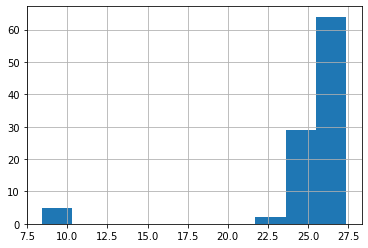

In [76]:
df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['SINR'].hist()

In [16]:
results = df_general_poly5dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
results

,Model,SINR
0,CorInfoMax,24.952910
1,CorInfoMax2,26.459609
2,LDMI,30.235116
3,PMF,27.334741


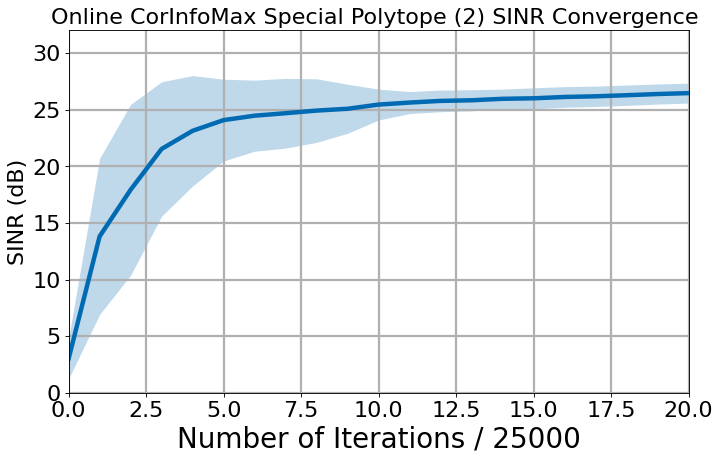

In [17]:
data = np.stack(df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMax2")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax Special Polytope (2) SINR Convergence ")
plt.axis([0.0,20.0,-0,32])
ApplyFont(plt.gca())

plt.savefig('Figures/CorInfoMax_5dimGeneralPolytope_Convergence.pdf', format='pdf')

In [8]:
df_general_poly5dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_5dimV2.pkl").iloc[:250]
print(df_general_poly5dim_results.shape[0])
results = df_general_poly5dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
results

250


,Model,SINR
0,CorInfoMax,27.063502
1,CorInfoMax2,30.939944
2,CorInfoMaxCanonical,26.197065
3,LDMI,38.504896
4,PMF,31.483125


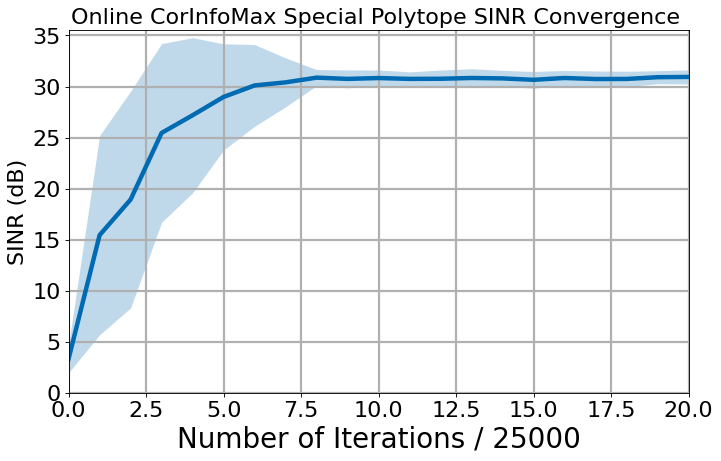

In [9]:
data = np.stack(df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMax2")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax Special Polytope SINR Convergence ")
plt.axis([0.0,20.0,-0,35.5])
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMax_5dimGeneralPolytope_Convergence_40dBSNR.pdf', format='pdf')

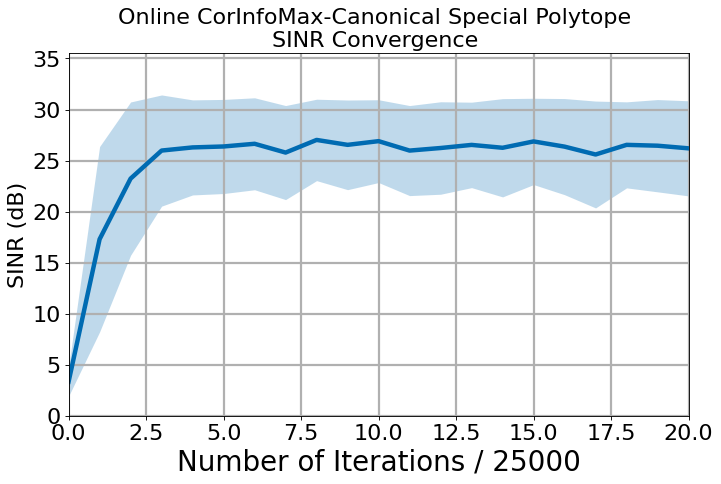

In [10]:
data = np.stack(df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMaxCanonical")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax-Canonical Special Polytope \nSINR Convergence ")
plt.axis([0.0,20.0,-0,35.5])
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxCanonical_5dimGeneralPolytope_Convergence_40dBSNR.pdf', format='pdf')

In [12]:
df_general_poly5dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_5dimV3.pkl").iloc[:250]
print(df_general_poly5dim_results.shape[0])
results = df_general_poly5dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
results

250


,Model,SINR
0,CorInfoMax,24.821231
1,CorInfoMax2,26.552054
2,CorInfoMaxCanonical,24.850103
3,LDMI,30.287287
4,PMF,27.683568


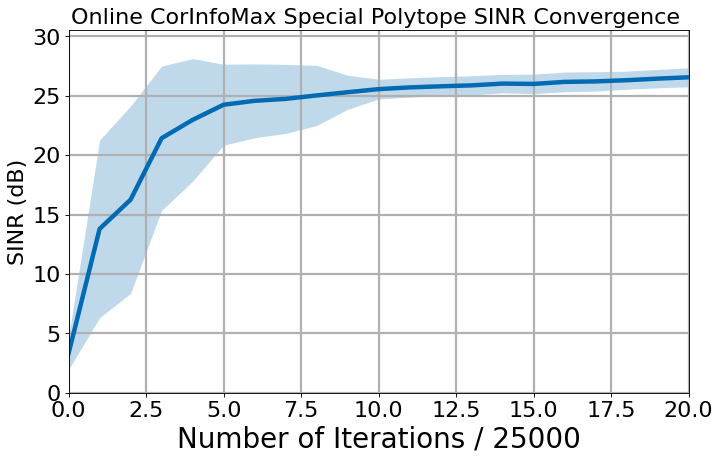

In [13]:
data = np.stack(df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMax2")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax Special Polytope SINR Convergence ")
plt.axis([0.0,20.0,-0,30.5])
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMax_5dimGeneralPolytope_Convergence_30dBSNR.pdf', format='pdf')

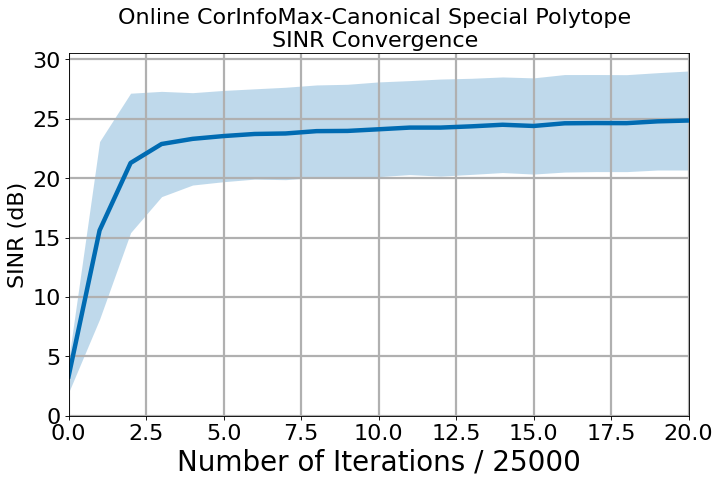

In [14]:
data = np.stack(df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMaxCanonical")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax-Canonical Special Polytope \nSINR Convergence ")
plt.axis([0.0,20.0,-0,30.5])
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxCanonical_5dimGeneralPolytope_Convergence_30dBSNR.pdf', format='pdf')

In [30]:
df_general_poly5dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_5dimV4.pkl").iloc[:250]
df_general_poly5dim_results = df_general_poly5dim_results.loc[df_general_poly5dim_results['SINR'] != -999]
print(df_general_poly5dim_results.shape[0])
results = df_general_poly5dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
results

49


,Model,SINR
0,CorInfoMax,26.289706
1,CorInfoMax2,30.914905
2,CorInfoMaxCanonical,26.264392
3,LDMI,38.468855
4,PMF,32.222994


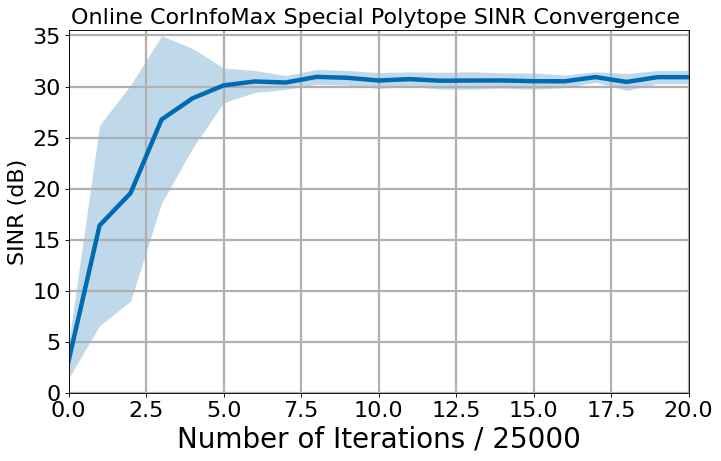

In [31]:
data = np.stack(df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMax2")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax Special Polytope SINR Convergence ")
plt.axis([0.0,20.0,-0,35.5])
ApplyFont(plt.gca())
# plt.savefig('Figures/CorInfoMax_5dimGeneralPolytope_Convergence_40dBSNR.pdf', format='pdf')

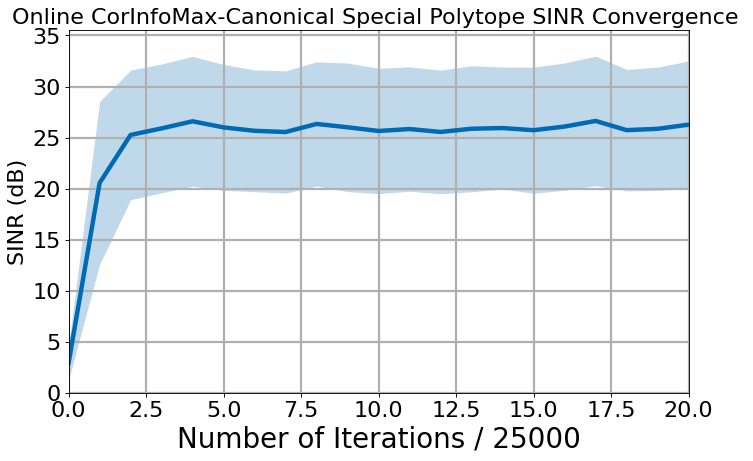

In [32]:
data = np.stack(df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMaxCanonical")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax-Canonical Special Polytope SINR Convergence ")
plt.axis([0.0,20.0,-0,35.5])
ApplyFont(plt.gca())
# plt.savefig('Figures/CorInfoMaxCanonical_5dimGeneralPolytope_Convergence_40dBSNR.pdf', format='pdf')

#  General Polytope 5 Dimensional Canonical

In [9]:
df_general_poly5dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_5dim_CanonicalV1.pkl")
print(df_general_poly5dim_results.shape)
results = df_general_poly5dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
results

(172, 12)


,Model,SINR
0,CorInfoMax,27.465090
1,CorInfoMaxCanonical,21.898767


In [3]:
df_general_poly5dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_5dim_CanonicalV2.pkl")
print(df_general_poly5dim_results.shape)
df_general_poly5dim_results =df_general_poly5dim_results.loc[df_general_poly5dim_results['SINR'] != -999]
results = df_general_poly5dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
results

(200, 12)


,Model,SINR
0,CorInfoMax,27.331897
1,CorInfoMaxCanonical,24.484459


In [4]:
df_general_poly5dim_results.loc[df_general_poly5dim_results['SINR'] == -999]

,trial,seed,Model,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


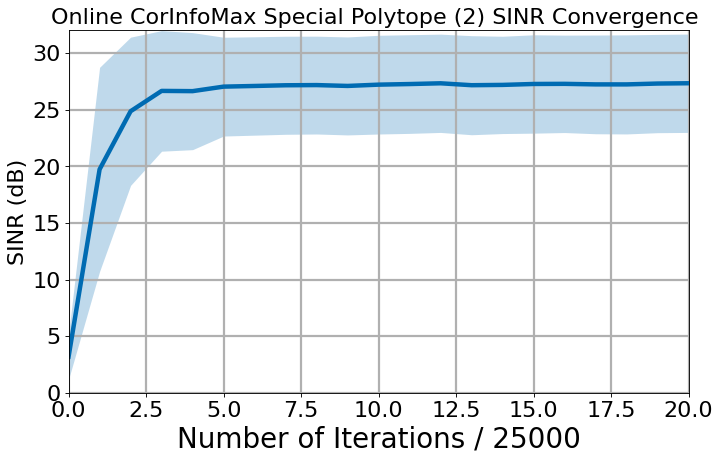

In [7]:
data = np.stack(df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMax")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax Special Polytope (2) SINR Convergence ")
plt.axis([0.0,20.0,-0,32])
ApplyFont(plt.gca())


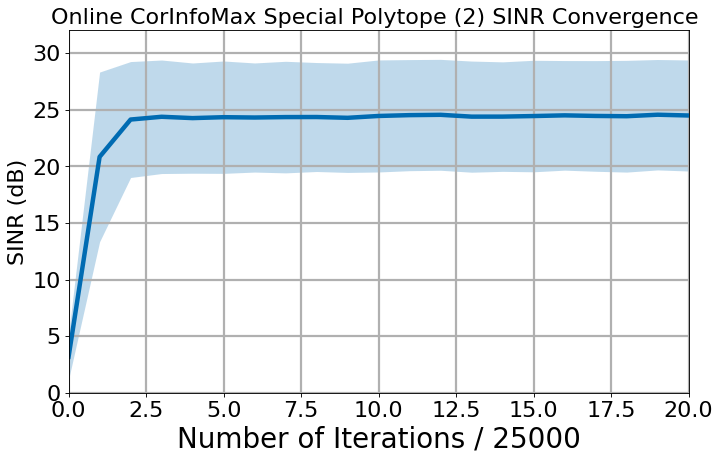

In [8]:
data = np.stack(df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMaxCanonical")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax Special Polytope (2) SINR Convergence ")
plt.axis([0.0,20.0,-0,32])
ApplyFont(plt.gca())


<AxesSubplot:>

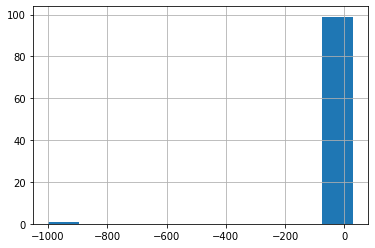

In [4]:
df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMaxCanonical")]['SINR'].hist()

# General Polytope 6 Dimensional

In [18]:
# df_general_poly6dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_6dimV1.pkl")
# df_general_poly6dim_results

In [19]:
# results = df_general_poly6dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
# results

In [20]:
# data = np.stack(df_general_poly6dim_results.loc[ (df_general_poly6dim_results['Model'] == "CorInfoMax2")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75 = perc(data)

# x = np.arange(0, med.shape[0])
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(x, med, linewidth=4, color='#006BB2')
# plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
# plt.title("Online CorInfoMax Special Polytope (3) SINR Convergence ")
# plt.axis([0.0,20.0,-0,32])
# ApplyFont(plt.gca())

In [21]:
# df_general_poly6dim_results.loc[ (df_general_poly6dim_results['Model'] == "CorInfoMax2")]['SINR'].hist()